In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\PID\PID_NL_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,NaN,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,NaN,66.0,23.0,94.0,28.1,0.167,NaN
4,0.0,137.0,40.0,NaN,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,0.0,36.8,NaN,27.0
765,5.0,121.0,72.0,23.0,NaN,26.2,0.245,30.0
766,1.0,126.0,60.0,0.0,NaN,30.1,0.349,47.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	57
float64		column 2	38
float64		column 3	95
float64		column 4	38
float64		column 5	114
float64		column 6	76
float64		column 7	114
float64		column 8	76


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,711.000000,730.000000,673.000000,730.000000,654.000000,692.000000,654.000000,692.000000
mean,3.786217,120.719178,69.052006,20.660274,72.120795,32.041185,0.458615,32.942197
std,3.259980,31.960354,18.791826,15.786980,104.138495,7.612755,0.308573,11.373649
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.600000,0.245000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,22.500000,32.150000,0.372500,29.000000
75%,6.000000,139.000000,80.000000,32.000000,115.000000,36.325000,0.597750,40.000000
max,17.000000,198.000000,114.000000,99.000000,744.000000,67.100000,2.329000,81.000000


<AxesSubplot:>

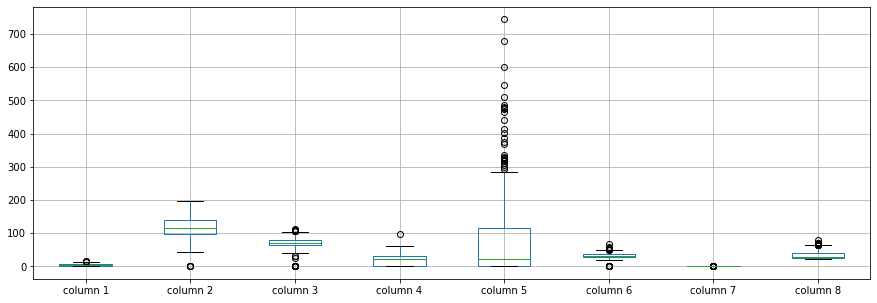

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      3.786217
column 2    120.719178
column 3     69.052006
column 4     20.660274
column 5     72.120795
column 6     32.041185
column 7      0.458615
column 8     32.942197
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.156027,0.128742,-0.049876,-0.115203,0.023193,-0.015992,0.560556
column 2,0.156027,1.000000,0.136132,0.050150,0.267747,0.175678,0.104365,0.255937
column 3,0.128742,0.136132,1.000000,0.223129,0.122898,0.238785,0.044084,0.179878
column 4,-0.049876,0.050150,0.223129,1.000000,0.401071,0.382773,0.142021,-0.126239
column 5,-0.115203,0.267747,0.122898,0.401071,1.000000,0.195630,0.247295,-0.101782
column 6,0.023193,0.175678,0.238785,0.382773,0.195630,1.000000,0.151306,0.017803
column 7,-0.015992,0.104365,0.044084,0.142021,0.247295,0.151306,1.000000,0.053127
column 8,0.560556,0.255937,0.179878,-0.126239,-0.101782,0.017803,0.053127,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+39,8+39+39,8+39+39+39,8+39+39+39+39,8+39+39+39+39+39,8+39+39+39+39+39+39,8+39+39+39+39+39,8+39+39+39+39,8+39+39+39,8+39+39,8+39,8], vae_layer = False, seed = 8)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 374.4014212290446
Epoch: 1 , loss: 373.81626383463544
Epoch: 2 , loss: 371.1864541371663
Epoch: 3 , loss: 369.6186230977376
Epoch: 4 , loss: 366.477081934611
Epoch: 5 , loss: 363.71079699198407
Epoch: 6 , loss: 361.7688344319661
Epoch: 7 , loss: 357.4633496602376
Epoch: 8 , loss: 353.6574815114339
Epoch: 9 , loss: 348.9532750447591
Epoch: 10 , loss: 347.3129011789958
Epoch: 11 , loss: 337.0106267929077
Epoch: 12 , loss: 339.35116386413574
Epoch: 13 , loss: 334.799378712972
Epoch: 14 , loss: 326.121839205424
Epoch: 15 , loss: 325.49027188618976
Epoch: 16 , loss: 312.0118405024211
Epoch: 17 , loss: 315.198917388916
Epoch: 18 , loss: 306.91404724121094
Epoch: 19 , loss: 300.7048619588216
Epoch: 20 , loss: 294.7574043273926
Epoch: 21 , loss: 293.10489813486737
Epoch: 22 , loss: 293.6460949579875
Epoch: 23 , loss: 288.7488142649333
Epoch: 24 , loss: 287.55157438913983
Epoch: 25 , loss: 289.2091754277547
Epoc

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(768, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     8.000000
column 2    99.000000
column 3    40.633602
column 4     0.000000
column 5     0.000000
column 6    20.215967
column 7     0.388000
column 8    50.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\PID.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.0,0.000000,0.0,0.000000,20.948263,0.000000,0.000000,0.000000
1,0.0,0.000000,0.0,0.000000,0.000000,18.710635,0.000000,0.000000
2,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,-4.271507,0.0,0.000000,0.000000,0.000000,0.000000,4.314308
4,0.0,0.000000,0.0,-13.660334,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
763,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
764,0.0,0.000000,0.0,0.000000,0.000000,0.000000,-0.008466,0.000000
765,0.0,0.000000,0.0,0.000000,-63.386440,0.000000,0.000000,0.000000
766,0.0,0.000000,0.0,0.000000,135.203278,0.000000,0.000000,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(2121.06055511398, 5776.576248839705)

In [17]:
NRMS=numerator/denominator
NRMS


0.3671829927874701

In [18]:
new_df.iloc[66,:]

column 1      0.000
column 2    109.000
column 3     88.000
column 4     30.000
column 5      0.000
column 6     32.500
column 7      0.855
column 8     38.000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6.0,148.000000,72.0,35.000000,20.948263,33.600000,0.627000,50.000000
1,1.0,85.000000,66.0,29.000000,0.000000,45.310635,0.351000,31.000000
2,8.0,183.000000,64.0,0.000000,0.000000,23.300000,0.672000,32.000000
3,1.0,84.728493,66.0,23.000000,94.000000,28.100000,0.167000,25.314308
4,0.0,137.000000,40.0,21.339666,168.000000,43.100000,2.288000,33.000000
...,...,...,...,...,...,...,...,...
763,10.0,101.000000,76.0,48.000000,180.000000,32.900000,0.171000,63.000000
764,2.0,122.000000,70.0,27.000000,0.000000,36.800000,0.331534,27.000000
765,5.0,121.000000,72.0,23.000000,48.613560,26.200000,0.245000,30.000000
766,1.0,126.000000,60.0,0.000000,135.203278,30.100000,0.349000,47.000000


In [21]:
imputations[-1].to_excel("PID_NL_10.xlsx", index=False, header=False)